In [21]:
import pandas
import numpy as np
from matplotlib import pyplot as plt
import seaborn

from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')


seaborn.set()
%matplotlib inline

In [53]:
df = pandas.read_excel("test_data.xlsx", sheetname=[0,1,2])

# General timeseries
Plot the timeseries of both the DA and RT LMP for each hub. Plot the difference between the DA and RT to get a feel for the volatility of the market.

In [23]:
market_data = df[0]
weather_data = df[1]
load_data = df[2]

nodes = market_data.nodename.unique()
market_data["diff"] = market_data["rtlmp"] - market_data["dalmp"]

node_data = {}
for node in nodes:
    node_data[node] = {"data": market_data.loc[market_data['nodename'] == node]}
    
    

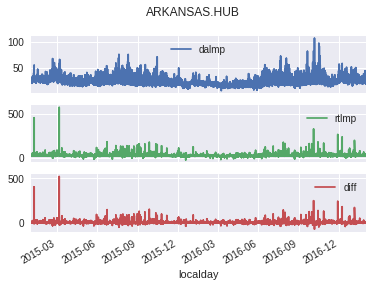

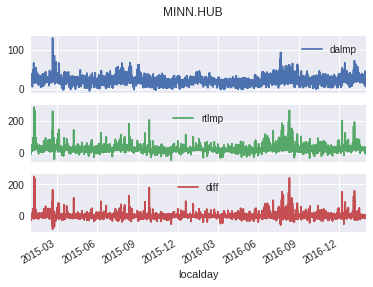

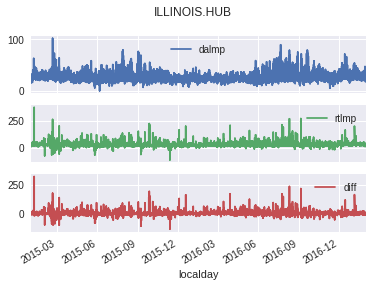

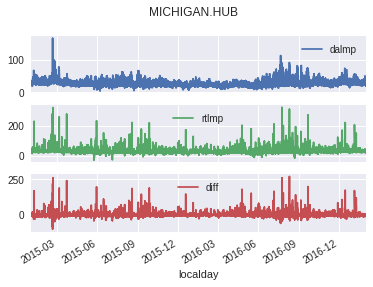

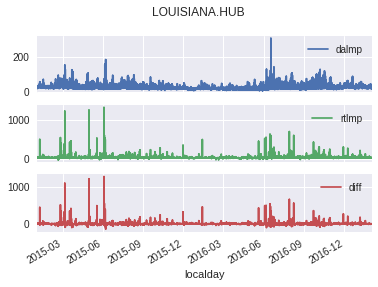

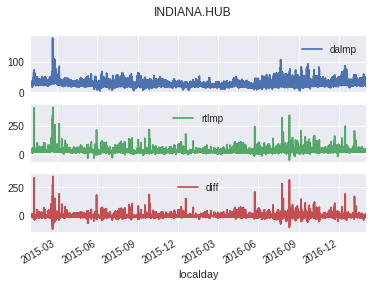

In [24]:
for node, data in node_data.items():
    data["data"].plot(x="localday", y=["dalmp", "rtlmp", "diff"], subplots=True, title=node)

# Check the seasonality of the dataset
Run a 1 month rolling smoothing window to look at seasonality trends

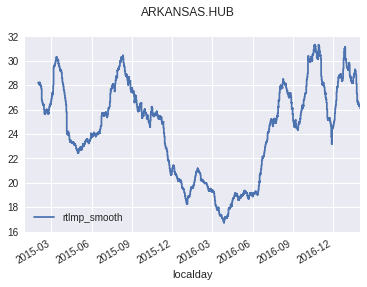

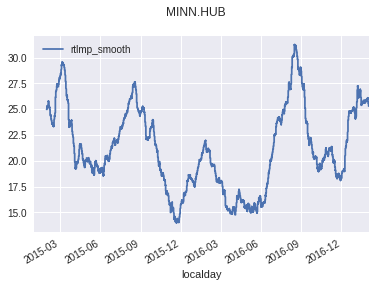

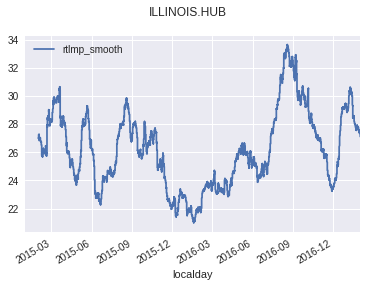

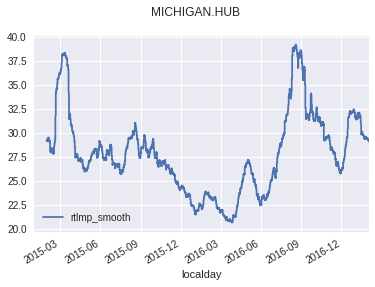

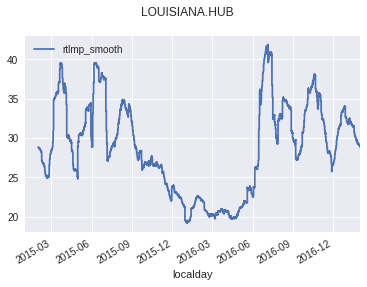

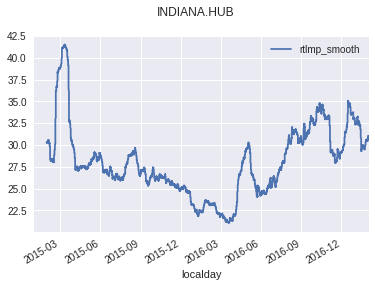

In [25]:
for node, data in node_data.items():
    plt.figure()
    d = pandas.DataFrame()
    smoothed = data["data"].rolling(window = 24*30)
    data["data"]["rtlmp_smooth"] = smoothed["rtlmp"].mean()
    data["data"]["rtlmp_detrended"] = data["data"]["rtlmp"] - smoothed["rtlmp"].mean()

    data["data"].plot(x="localday", y=["rtlmp_smooth"], subplots=True, title=node)

# Variance of the RT after removing larger trends

Get a feel for how the spread of values. This determines the investment risk and potential returns.

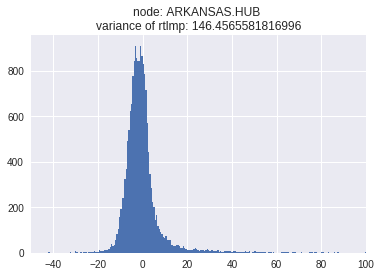

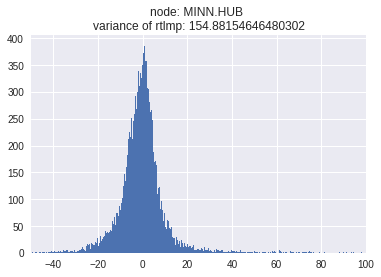

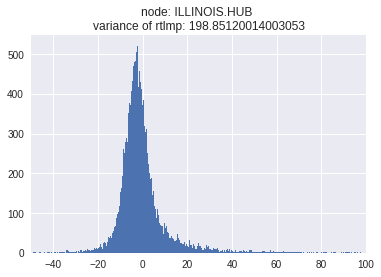

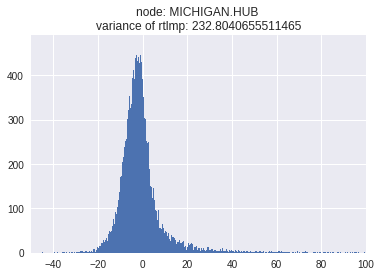

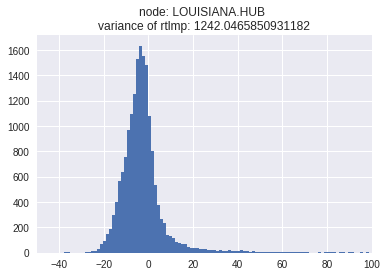

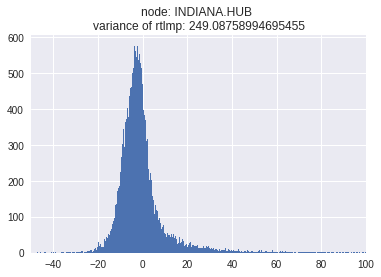

In [26]:
for node, data in node_data.items():
    ax = data["data"].hist(column="rtlmp_detrended", bins=1000)[0][0]
    ax.set_xlim(-50,100)
    var = data["data"].var()["rtlmp_detrended"]
    ax.set_title("node: {node} \nvariance of rtlmp: {variance}".format(node=node, variance=var))

# Daily profile

Remove the seasonality trend and see how the daily profile in each hub.

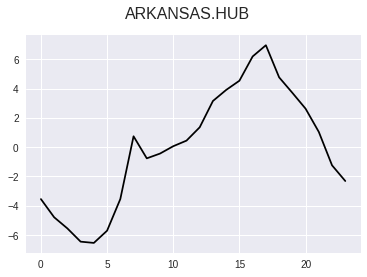

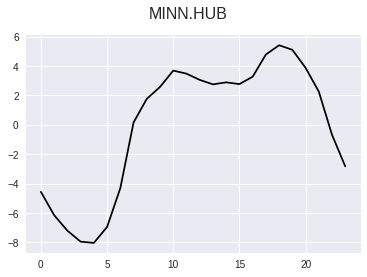

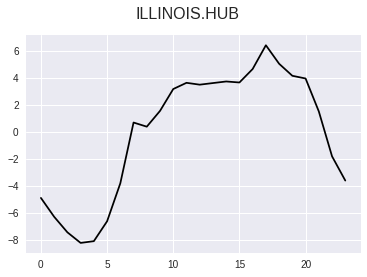

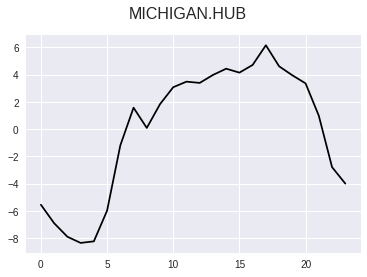

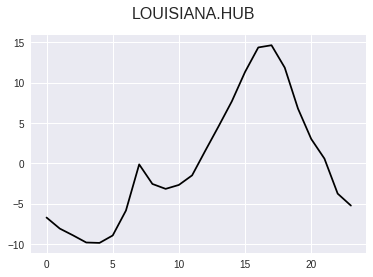

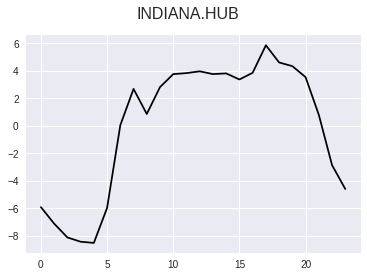

In [27]:
hours = market_data.he.unique()
for node, data in node_data.items():
        
    mean_rtlmp = np.zeros(hours.size)
    var_rtlmp = np.zeros(hours.size)
    
    for i, hour in enumerate(hours):

        
        d = data["data"].loc[data["data"].he == hour]
        mean_rtlmp[i] = (d.mean()["rtlmp_detrended"])
        #var_rtlmp[i] = d.var()["rtlmp_detrended"]
        
    plt.figure()
    plt.suptitle(node, fontsize=16)
    plt.plot(mean_rtlmp, 'k-') 